In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#定义优化对象

In [2]:
def f(x):
    return x[0]*x[0]+50*x[1]*x[1]

In [3]:
# f的导数
def g(x):
    return np.array([2*x[0],100*x[1]])

In [ ]:
#生成数据

In [4]:
xi = np.linspace(-200,200,1000)
yi = np.linspace(-100,100,1000)
X,Y = np.meshgrid(xi,yi)  # meshgrid生成网格点坐标矩阵
Z = X*X + 50 * Y * Y

In [ ]:
#等高线图绘制

In [17]:
def contour(X,Y,Z,arr=None):
    plt.figure(figsize=(10,5))
    xx = X.flatten()
    yy = Y.flatten()
    zz = Z.flatten()
    plt.contour(X,Y,Z,colors='black')  
    plt.plot(0,0,marker='*')
    if arr is not None:      # arr是参数历史值的列表
        arr = np.array(arr)
        for i in range(len(arr)-1):
            plt.plot(arr[i:i+2,0],arr[i:i+2,1])  # 取相邻的两次历史值画线，得到前进路线

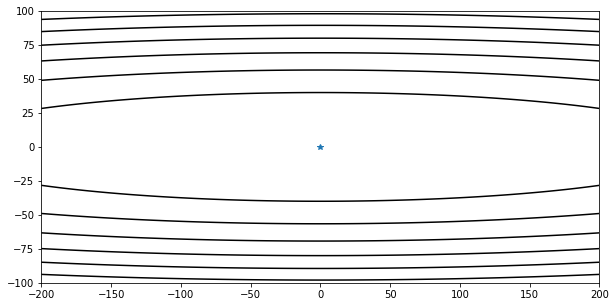

In [18]:
contour(X,Y,Z)

### Vanilla Gradient Descent

In [32]:
def gd(x_start,step,g):  # 这里的x是参数
    x = np.array(x_start,dtype='float64')
    passing_dot = [x.copy()]  # 保存参数历史状态
    for i in range(50):
        grad=g(x)
        x -= grad*step
        passing_dot.append(x.copy())
#         print('Epoch{0} grad={1} x={2}'.format(i,grad,x))
        if abs(sum(grad))<1e-6:
            break
    return x,passing_dot            

In [ ]:
#可以多调节learning rate看看结果

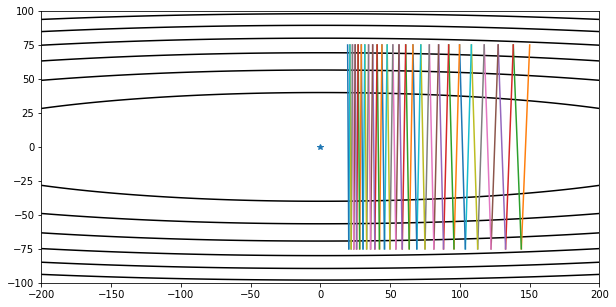

In [49]:
res,x_arr = gd([150,75],0.02,g)
print(x,x_arr)
contour(X,Y,Z,x_arr)

### Momentum

In [61]:
def momentum(x_start,step,g,discount=0.7):
    x = np.array(x_start,dtype='float64')
    passing_dot = [x.copy()]
    pre_grad = np.zeros_like(x)  # 保存x上一步的状态
    for i in range(20):
        grad=g(x)
        pre_grad = pre_grad*discount+grad
        x -= pre_grad*step
        passing_dot.append(x.copy())
        print('Epoch{0} grad={1} x={2}'.format(i,grad,x))
        if abs(sum(grad))<1e-6:
            break
    return x,passing_dot      

Epoch0 grad=[ 300. 7500.] x=[147.   0.]
Epoch1 grad=[294.   0.] x=[141.96 -52.5 ]
Epoch2 grad=[  283.92 -5250.  ] x=[135.5928 -36.75  ]
Epoch3 grad=[  271.1856 -3675.    ] x=[128.423904  11.025   ]
Epoch4 grad=[ 256.847808 1102.5     ] x=[120.83719872  33.4425    ]
Epoch5 grad=[ 241.67439744 3344.25      ] x=[113.10976105  15.69225   ]
Epoch6 grad=[ 226.2195221 1569.225    ] x=[105.43835946 -12.425175  ]
Epoch7 grad=[  210.87671892 -1242.5175    ] x=[ 97.95961116 -19.6821975 ]
Epoch8 grad=[  195.91922231 -1968.21975   ] x=[90.76529512 -5.07991575]
Epoch9 grad=[ 181.53059024 -507.991575  ] x=[83.913968   10.22159722]
Epoch10 grad=[ 167.82793599 1022.1597225 ] x=[77.43975965 10.71105908]
Epoch11 grad=[ 154.87951929 1071.10590825] x=[71.35901861  0.3426233 ]
Epoch12 grad=[142.71803722  34.26233002] x=[65.67531951 -7.25790505]
Epoch13 grad=[ 131.35063902 -725.79050476] x=[60.38322375 -5.32036984]
Epoch14 grad=[ 120.76644751 -532.03698435] x=[55.47109225  1.35627464]
Epoch15 grad=[110.94218

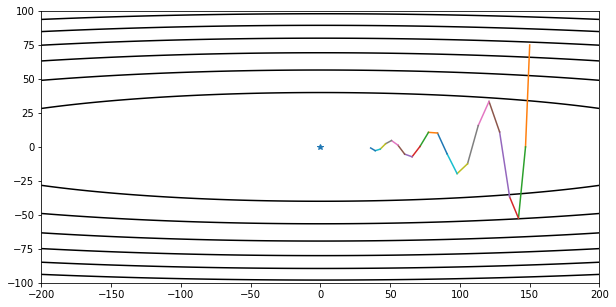

In [71]:
res,x_arr = momentum([150,75],0.01,g)
contour(X,Y,Z,x_arr)

### Nesterov Accelerate Gradient

In [65]:
def nesterov(x_start,step,g,discount=0.7):
    x = np.array(x_start,dtype='float64')
    passing_dot = [x.copy()]
    pre_grad = np.zeros_like(x)
    for i in range(20):
        x_future = x-step*discount*pre_grad  # 计算未来的参数
        grad=g(x_future) # 求未来参数的梯度
        pre_grad = pre_grad*discount+grad
        x -= pre_grad*step
        passing_dot.append(x.copy())
#         print('Epoch{0} grad={1} x={2}'.format(i,grad,x))
        if abs(sum(grad))<1e-6:
            break
    return x,passing_dot

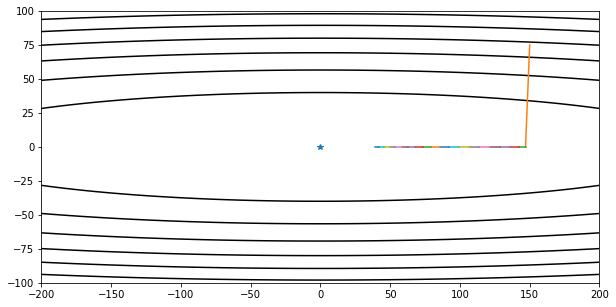

In [70]:
res,x_arr = nesterov([150,75],0.01,g)
contour(X,Y,Z,x_arr)

### Momentum 能够避免学习率过大带到的梯度爆炸，还能够加速训练

### NAG能够避免Zigzag,但学习率不能够过大